In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ( precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, log_loss
)


Loan Approval Classification Analysis
In this analysis, I'm going to work on a loan approval classification model used in banks and insurance companies. Features for this dataset are:
- Person age
- Person gender
- Person education
- Person income
- Loan interest rate
- Person_emp_exp → years of employment experience
- Person home ownership type
- Loan amount → amount requested
- Loan intent → intended purpose of the loan
- Loan percent income → loan amount as a percentage of annual income
- cb_person_cred_hist_length → length of credit history in years
- Credit score
- Previous_loan_defaults_on_file → Indicator of previous loan defaults

Our target value is loan status (approved or not).

I will analyze this dataset both for insights and prediction using different models (logistic regression, KNN, and ensemble methods).

The link to this dataset is available here: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

Loading the data

In [3]:
df = pd.read_csv('../datasets/loan_data.csv')

A sample of the first and last 5 rows

In [131]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


We can observe that this data set consists of both numerical and categorical values. A few outliers, such as max age being 144 and max years of employment experience being 125 can also be spotted in the statistical description below. (im going to truncate these to a max age of 84 and max work experience at 65 later).

In [132]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [133]:
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Cheking for duplication ==> no null values or duplication

In [135]:
df.duplicated().sum()

0

Taking a look at statistical features of the numerical columns.

In [136]:
numerical_data = df.select_dtypes(['float', 'int'])

# Categorical values

In [137]:
categorical_values = df.select_dtypes(['object'])
categorical_values

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No
...,...,...,...,...,...
44995,male,Associate,RENT,MEDICAL,No
44996,female,Associate,RENT,HOMEIMPROVEMENT,No
44997,male,Associate,RENT,DEBTCONSOLIDATION,No
44998,male,Bachelor,RENT,EDUCATION,No


plots below are a clear view of the distribution between different categorcial features.

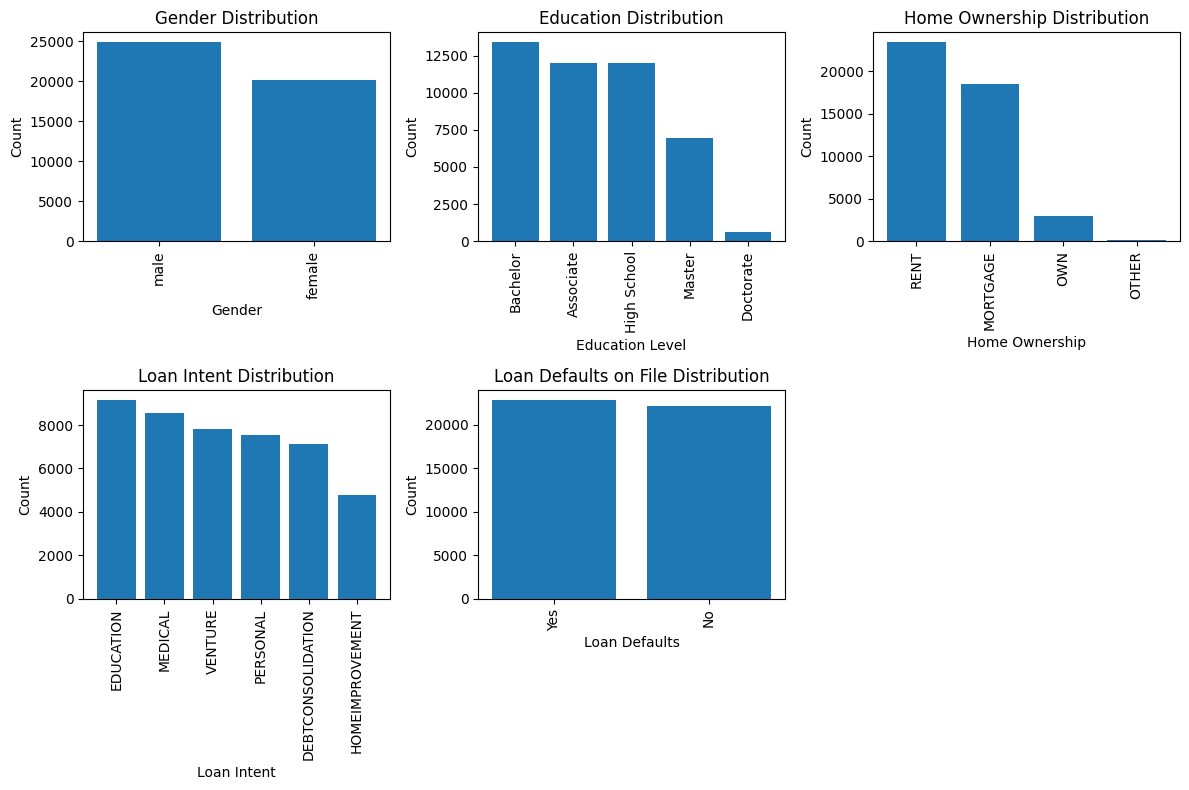

In [138]:
gender_counts = categorical_values['person_gender'].value_counts()
person_education = categorical_values['person_education'].value_counts()
person_home_ownership = categorical_values['person_home_ownership'].value_counts()
loan_intent = categorical_values['loan_intent'].value_counts()
previous_loan_defaults_on_file = categorical_values['previous_loan_defaults_on_file'].value_counts()
fig, axis = plt.subplots(2, 3, figsize=[12, 8])
axis[0, 0].bar(gender_counts.index, gender_counts.values )
axis[0, 0].set_title('Gender Distribution')
axis[0, 0].set_xlabel('Gender')
axis[0, 0].set_ylabel('Count')
axis[0, 0].tick_params(axis='x', rotation=90) 


# Plot Education Distribution
axis[0, 1].bar(person_education.index, person_education.values)
axis[0, 1].set_title('Education Distribution')
axis[0, 1].set_xlabel('Education Level')
axis[0, 1].set_ylabel('Count')
axis[0, 1].tick_params(axis='x', rotation=90) 


# Plot Home Ownership Distribution
axis[0, 2].bar(person_home_ownership.index, person_home_ownership.values)
axis[0, 2].set_title('Home Ownership Distribution')
axis[0, 2].set_xlabel('Home Ownership')
axis[0, 2].set_ylabel('Count')
axis[0, 2].tick_params(axis='x', rotation=90) 


# Plot Loan Intent Distribution
axis[1, 0].bar(loan_intent.index, loan_intent.values)
axis[1, 0].set_title('Loan Intent Distribution')
axis[1, 0].set_xlabel('Loan Intent')
axis[1, 0].set_ylabel('Count')
axis[1, 0].tick_params(axis='x', rotation=90) 


# Plot Loan Defaults Distribution
axis[1, 1].bar(previous_loan_defaults_on_file.index, previous_loan_defaults_on_file.values)
axis[1, 1].set_title('Loan Defaults on File Distribution')
axis[1, 1].set_xlabel('Loan Defaults')
axis[1, 1].set_ylabel('Count')
axis[1, 1].tick_params(axis='x', rotation=90) 


axis[1, 2].axis('off')

plt.tight_layout()
plt.show()

most home owners are from rent and mortgage category and there is a good distribution in loan intent. it is also clear that most loan applications are from males.

In [139]:
numerical_data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [140]:
numerical_data = numerical_data[numerical_data['person_age'] <=95]
numerical_data

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1
...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,1
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,1
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,1
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,1


- We can clearly observe several outliers in the data. The income variable demonstrates particularly high variance, with values ranging from just two-digit numbers to millions. This significant scale difference across features indicates that data normalization or standardization will be necessary before modeling to prevent variables with larger magnitudes from dominating the analysis.

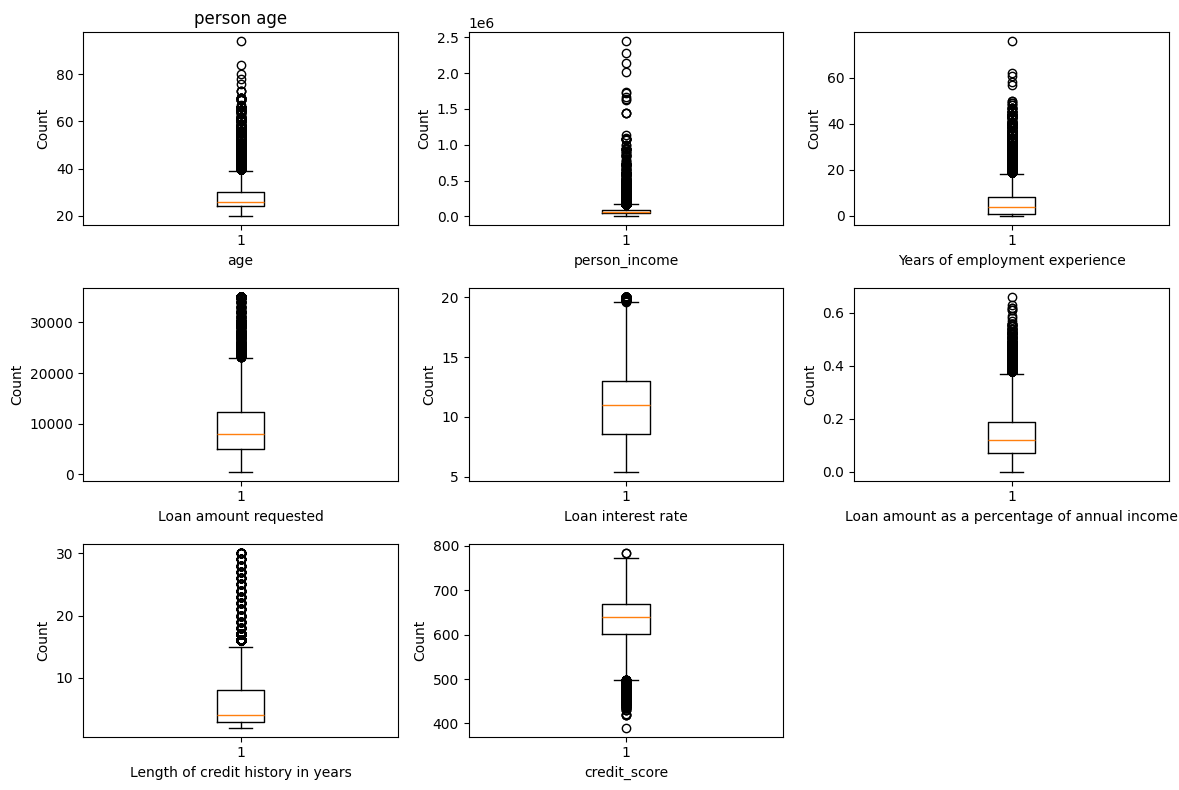

In [141]:
fig, axis = plt.subplots(3, 3, figsize=[12, 8])
#age
axis[0, 0].boxplot(numerical_data['person_age'])
axis[0, 0].set_title('person age')
axis[0, 0].set_xlabel('age')
axis[0, 0].set_ylabel('Count')
#income
axis[0, 1].boxplot(numerical_data['person_income'])
axis[0, 1].set_xlabel('person_income')
axis[0, 1].set_ylabel('Count')
#employment exp
axis[0, 2].boxplot(numerical_data['person_emp_exp'])
axis[0, 2].set_xlabel('Years of employment experience')
axis[0, 2].set_ylabel('Count')
#loan amount
axis[1, 0].boxplot(numerical_data['loan_amnt'])
axis[1, 0].set_xlabel('Loan amount requested')
axis[1, 0].set_ylabel('Count')
#loan interest rate
axis[1, 1].boxplot(numerical_data['loan_int_rate'])
axis[1, 1].set_xlabel('Loan interest rate')
axis[1, 1].set_ylabel('Count')
#loan_percent_income
axis[1, 2].boxplot(numerical_data['loan_percent_income'])
axis[1, 2].set_xlabel('Loan amount as a percentage of annual income')
axis[1, 2].set_ylabel('Count')
#Length of credit history in years
axis[2, 0].boxplot(numerical_data['cb_person_cred_hist_length'])
axis[2, 0].set_xlabel('Length of credit history in years')
axis[2, 0].set_ylabel('Count')
#Credit score of the person
axis[2 ,1].boxplot(numerical_data['credit_score'])
axis[2, 1].set_xlabel('credit_score')
axis[2 ,1].set_ylabel('Count')
plt.tight_layout()
axis[2, 2].axis('off')

plt.show()

- Loan status distribution. this is the target value and what we want to predict. there is imbalance that will be fixed if needed. however logically we can observe that in most cases loan was not approved.

In [142]:
df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

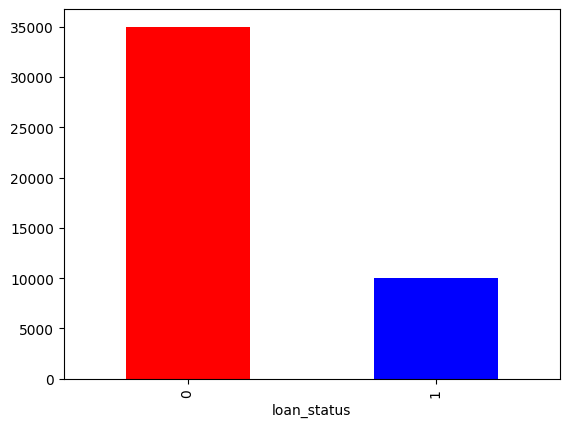

In [143]:
df['loan_status'].value_counts().plot.bar(color=['red', 'blue'])
plt.show()

# Data engineering and cleaning

In [144]:
numeric_cols = numerical_data.columns

Only removing the outliers from age and work expriecne. since maximum age and work exprience all well above normal human life span. i did not consider any limit for income.

In [145]:
df = df[df['person_age'] <=95]
df = df[df['person_emp_exp'] <=65]


In [146]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44992.000000,4.499200e+04,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000
mean,27.746955,7.990956e+04,5.392959,9583.245288,11.006448,0.139735,5.866087,632.582592,0.222262
std,5.901543,6.332239e+04,5.917871,6314.856103,2.979019,0.087207,3.875930,50.398623,0.415771
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.719725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704600e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.577900e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,84.000000,2.448661e+06,62.000000,35000.000000,20.000000,0.660000,30.000000,784.000000,1.000000


spliting the data into target value (y) and features (X)

In [147]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']


categorical data need to be encoded.

In [148]:
df.select_dtypes('object')

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No
...,...,...,...,...,...
44995,male,Associate,RENT,MEDICAL,No
44996,female,Associate,RENT,HOMEIMPROVEMENT,No
44997,male,Associate,RENT,DEBTCONSOLIDATION,No
44998,male,Bachelor,RENT,EDUCATION,No


In [149]:
X.person_gender.value_counts()

person_gender
male      24835
female    20157
Name: count, dtype: int64

In [150]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44992 entries, 0 to 44999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44992 non-null  float64
 1   person_gender                   44992 non-null  object 
 2   person_education                44992 non-null  object 
 3   person_income                   44992 non-null  float64
 4   person_emp_exp                  44992 non-null  int64  
 5   person_home_ownership           44992 non-null  object 
 6   loan_amnt                       44992 non-null  float64
 7   loan_intent                     44992 non-null  object 
 8   loan_int_rate                   44992 non-null  float64
 9   loan_percent_income             44992 non-null  float64
 10  cb_person_cred_hist_length      44992 non-null  float64
 11  credit_score                    44992 non-null  int64  
 12  previous_loan_defaults_on_file  44992

In [151]:
person_gender = pd.get_dummies(X.person_gender)
X = pd.concat([X, person_gender], axis=1)
X.drop('person_gender', axis=1 ,inplace = True)

In [152]:
encoded_df = pd.get_dummies(X['person_home_ownership'], prefix='ownership')
X = pd.concat([X, encoded_df], axis=1)
X.drop('person_home_ownership', axis=1 ,inplace = True)
X.head()

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,female,male,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,22.0,Master,71948.0,0,35000.0,PERSONAL,16.02,0.49,3.0,561,No,True,False,False,False,False,True
1,21.0,High School,12282.0,0,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,True,False,False,False,True,False
2,25.0,High School,12438.0,3,5500.0,MEDICAL,12.87,0.44,3.0,635,No,True,False,True,False,False,False
3,23.0,Bachelor,79753.0,0,35000.0,MEDICAL,15.23,0.44,2.0,675,No,True,False,False,False,False,True
4,24.0,Master,66135.0,1,35000.0,MEDICAL,14.27,0.53,4.0,586,No,False,True,False,False,False,True


In [153]:
education_categories = [['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']]
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=education_categories)

X['person_education'] = ordinal_encoder.fit_transform(X[['person_education']])

In [154]:
X.head()

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,female,male,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,22.0,3.0,71948.0,0,35000.0,PERSONAL,16.02,0.49,3.0,561,No,True,False,False,False,False,True
1,21.0,0.0,12282.0,0,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,True,False,False,False,True,False
2,25.0,0.0,12438.0,3,5500.0,MEDICAL,12.87,0.44,3.0,635,No,True,False,True,False,False,False
3,23.0,2.0,79753.0,0,35000.0,MEDICAL,15.23,0.44,2.0,675,No,True,False,False,False,False,True
4,24.0,3.0,66135.0,1,35000.0,MEDICAL,14.27,0.53,4.0,586,No,False,True,False,False,False,True


In [155]:
X['previous_loan_defaults_on_file'] = X['previous_loan_defaults_on_file'].apply(lambda x: False if x == "No" else True)

In [156]:
X.loan_intent.value_counts()

loan_intent
EDUCATION            9151
MEDICAL              8547
VENTURE              7815
PERSONAL             7551
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

In [157]:
loan_intent = pd.get_dummies(X['loan_intent'], prefix='intent')
X = pd.concat([X, loan_intent], axis=1)
X.drop('loan_intent', axis=1, inplace=True)

In [158]:
X.head()

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT,intent_DEBTCONSOLIDATION,intent_EDUCATION,intent_HOMEIMPROVEMENT,intent_MEDICAL,intent_PERSONAL,intent_VENTURE
0,22.0,3.0,71948.0,0,35000.0,16.02,0.49,3.0,561,False,...,False,False,False,True,False,False,False,False,True,False
1,21.0,0.0,12282.0,0,1000.0,11.14,0.08,2.0,504,True,...,False,False,True,False,False,True,False,False,False,False
2,25.0,0.0,12438.0,3,5500.0,12.87,0.44,3.0,635,False,...,True,False,False,False,False,False,False,True,False,False
3,23.0,2.0,79753.0,0,35000.0,15.23,0.44,2.0,675,False,...,False,False,False,True,False,False,False,True,False,False
4,24.0,3.0,66135.0,1,35000.0,14.27,0.53,4.0,586,False,...,False,False,False,True,False,False,False,True,False,False


All the non numneric features

In [160]:
dtypes = X.dtypes
non_numeric_features = dtypes[~dtypes.isin(['float64', 'float32', 'int64', 'int32', 'int16', 'int8'])]
print(non_numeric_features)

previous_loan_defaults_on_file    bool
female                            bool
male                              bool
ownership_MORTGAGE                bool
ownership_OTHER                   bool
ownership_OWN                     bool
ownership_RENT                    bool
intent_DEBTCONSOLIDATION          bool
intent_EDUCATION                  bool
intent_HOMEIMPROVEMENT            bool
intent_MEDICAL                    bool
intent_PERSONAL                   bool
intent_VENTURE                    bool
dtype: object


scaling the numerical values

In [161]:
X

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT,intent_DEBTCONSOLIDATION,intent_EDUCATION,intent_HOMEIMPROVEMENT,intent_MEDICAL,intent_PERSONAL,intent_VENTURE
0,22.0,3.0,71948.0,0,35000.0,16.02,0.49,3.0,561,False,...,False,False,False,True,False,False,False,False,True,False
1,21.0,0.0,12282.0,0,1000.0,11.14,0.08,2.0,504,True,...,False,False,True,False,False,True,False,False,False,False
2,25.0,0.0,12438.0,3,5500.0,12.87,0.44,3.0,635,False,...,True,False,False,False,False,False,False,True,False,False
3,23.0,2.0,79753.0,0,35000.0,15.23,0.44,2.0,675,False,...,False,False,False,True,False,False,False,True,False,False
4,24.0,3.0,66135.0,1,35000.0,14.27,0.53,4.0,586,False,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1.0,47971.0,6,15000.0,15.66,0.31,3.0,645,False,...,False,False,False,True,False,False,False,True,False,False
44996,37.0,1.0,65800.0,17,9000.0,14.07,0.14,11.0,621,False,...,False,False,False,True,False,False,True,False,False,False
44997,33.0,1.0,56942.0,7,2771.0,10.02,0.05,10.0,668,False,...,False,False,False,True,True,False,False,False,False,False
44998,29.0,2.0,33164.0,4,12000.0,13.23,0.36,6.0,604,False,...,False,False,False,True,False,True,False,False,False,False


In [162]:
X_numerical = X.select_dtypes([float , int])
X_numerical.describe()

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
count,44992.000000,44992.000000,4.499200e+04,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000
mean,27.746955,1.383401,7.990956e+04,5.392959,9583.245288,11.006448,0.139735,5.866087,632.582592
std,5.901543,1.077763,6.332239e+04,5.917871,6314.856103,2.979019,0.087207,3.875930,50.398623
min,20.000000,0.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000
25%,24.000000,0.000000,4.719725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000
50%,26.000000,1.000000,6.704600e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000
75%,30.000000,2.000000,9.577900e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000
max,84.000000,4.000000,2.448661e+06,62.000000,35000.000000,20.000000,0.660000,30.000000,784.000000


In [163]:
scaler = StandardScaler()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns.remove('person_education') 
scaler = StandardScaler()
X_scaled_numerical = scaler.fit_transform(X[numerical_columns])
X[numerical_columns] = X_scaled_numerical


In [164]:
X.head()

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT,intent_DEBTCONSOLIDATION,intent_EDUCATION,intent_HOMEIMPROVEMENT,intent_MEDICAL,intent_PERSONAL,intent_VENTURE
0,-0.973816,3.0,-0.125732,-0.911311,4.024959,1.682973,4.016533,-0.739466,-1.420344,False,...,False,False,False,True,False,False,False,False,True,False
1,-1.143265,0.0,-1.068000,-0.911311,-1.359230,0.044831,-0.684984,-0.997472,-2.551340,True,...,False,False,True,False,False,True,False,False,False,False
2,-0.465469,0.0,-1.065536,-0.404366,-0.646617,0.625566,3.443178,-0.739466,0.047966,False,...,True,False,False,False,False,False,False,True,False,False
3,-0.804367,2.0,-0.002472,-0.911311,4.024959,1.417782,3.443178,-0.997472,0.841648,False,...,False,False,False,True,False,False,False,True,False,False
4,-0.634918,3.0,-0.217533,-0.742329,4.024959,1.095525,4.475218,-0.481461,-0.924293,False,...,False,False,False,True,False,False,False,True,False,False


a heatmap of the correlations between numerical values. we can see the positive relationship between age and credit history and employment years. on the other hand we can see that there is a negetive relationship between higher income and loand amount.

### Key finding
there is a logical connection between 

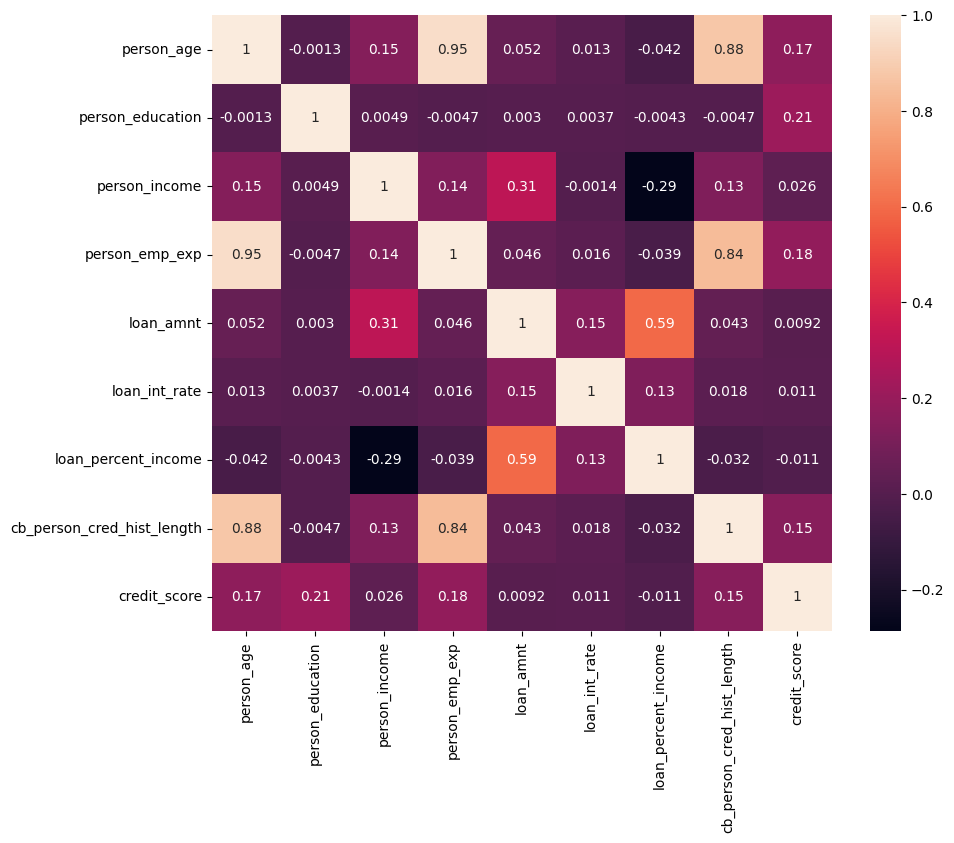

In [165]:
numerical_values = X.select_dtypes([float, int])
plt.figure(figsize=(10, 8))  
feature_cor = numerical_values.corr() 
sns.heatmap(feature_cor,annot=True)
plt.show()

# Models
in this section i used three models to evaluate which one performs better. these models are logistic regression, KNN and Xgboost.

- Logistic regression

In [166]:
kf = KFold(shuffle=True, random_state=42)
accuracies = []
for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

In [167]:
print(f"Accuracy scores for each fold: {accuracies}")
print(f"Mean accuracy: {sum(accuracies) / len(accuracies):.4f}")

Accuracy scores for each fold: [0.8978775419491054, 0.8968774308256473, 0.8983107357190486, 0.8990886863747499, 0.8900866859302067]
Mean accuracy: 0.8964


In [175]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  

acc_log_reg = accuracy_score(y_test, y_pred)
prec_log_reg = precision_score(y_test, y_pred)
rec_log_reg = recall_score(y_test, y_pred)
f1_log_reg = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
lloss = log_loss(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc_log_reg:.3f}")
print(f"Precision: {prec_log_reg:.3f}")
print(f"Recall: {rec_log_reg:.3f}")
print(f"F1 Score: {f1_log_reg:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")
print(f"Log Loss: {lloss:.3f}")
print("Confusion Matrix:\n", cm)


Accuracy: 0.932
Precision: 0.883
Recall: 0.801
F1 Score: 0.840
ROC AUC: 0.977
Log Loss: 0.154
Confusion Matrix:
 [[6775  214]
 [ 400 1609]]


###  Logistic regression assesment
this is a good performing model with a few strengths:
high accuracy and excellent ROC AUC value
solid F1 score balancing precision and recall
Aareas for potential improvement:
recall could be improved to reduce false negatives
rrecision improvements would reduce false positives

given the imbalanced nature of the dataset, the strong ROC AUC score is particularly important, showing the model performs well despite the class imbalance.

- KNN
- i used the same scaled frame for all of the models.

In [176]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []
log_losses = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = KNeighborsClassifier(n_neighbors=8)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] 
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc = roc_auc_score(y_test, y_prob)
    ll = log_loss(y_test, y_prob)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)
    roc_aucs.append(roc)
    log_losses.append(ll)

print(f"Mean Accuracy: {sum(accuracies) / len(accuracies):.3f}")
print(f"Mean Precision: {sum(precisions) / len(precisions):.3f}")
print(f"Mean Recall: {sum(recalls) / len(recalls):.3f}")
print(f"Mean F1 Score: {sum(f1_scores) / len(f1_scores):.3f}")
print(f"Mean ROC AUC: {sum(roc_aucs) / len(roc_aucs):.3f}")
print(f"Mean Log Loss: {sum(log_losses) / len(log_losses):.3f}")

Mean Accuracy: 0.896
Mean Precision: 0.875
Mean Recall: 0.623
Mean F1 Score: 0.727
Mean ROC AUC: 0.931
Mean Log Loss: 0.524


### KNN model:

Strengths:

- high accuracy and precision
- excellent ROC AUC score
- great at minimizing false positives


### Limitations:

- lower recall suggests it misses some positive cases
- high log loss indicates poor probability calibration
### todos:
- parameter tuning: changing k with more values. (i used 10 different values)
- feature selection: maybe reducing dimensionality if using many features


- Xgboost model

in this section i used a xgboost model. this model was shown to be the best in between the three for this analysis. 

In [ ]:
from xgboost import XGBClassifier

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Metrics storage
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []
log_losses = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc = roc_auc_score(y_test, y_prob)
    ll = log_loss(y_test, y_prob)
    
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)
    roc_aucs.append(roc)
    log_losses.append(ll)

print(f"Mean Accuracy: {sum(accuracies) / len(accuracies):.3f}")
print(f"Mean Precision: {sum(precisions) / len(precisions):.3f}")
print(f"Mean Recall: {sum(recalls) / len(recalls):.3f}")
print(f"Mean F1 Score: {sum(f1_scores) / len(f1_scores):.3f}")
print(f"Mean ROC AUC: {sum(roc_aucs) / len(roc_aucs):.3f}")
print(f"Mean Log Loss: {sum(log_losses) / len(log_losses):.3f}")


/home/majid/.local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [11:49:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/majid/.local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [11:49:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/majid/.local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [11:49:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/majid/.local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [11:49:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/majid/.local/lib/python3.11/site-packages/xgboost/training.py:

Mean Accuracy: 0.934
Mean Precision: 0.890
Mean Recall: 0.803
Mean F1 Score: 0.844
Mean ROC AUC: 0.979
Mean Log Loss: 0.149


Xgboost model demonstrates the best performance across all metrics:

- every single metric shows significant improvement over previous iterations
- the balance between precision and recall is excellent
- the extremely high ROC AUC indicates near-perfect ranking ability
- the low log loss suggests a well tuned probability estimates

### Conclusion 
- Xgboost model achieves better performance on every metric compared to other models.
- the high recall while maintaining excellent precision
- the combination of high accuracy with well-balanced precision/recall suggests it will perform well in real conditions and unseen data

# Future suggestions
- testing other models and NN 
- more hyper prama tunig to achieve better evaluation
- deploying the model for real analysis.
- is it also usefull to solve some of the imbalance data distributions.